# Advent of Code: Day 5

## Dependencies

In [1]:
using Base.Iterators
using Combinatorics
using Match
using Luxor
using Underscores

## Data

In [2]:
#inf = "ExampleInput.txt"
inf = "SolutionInput.txt"

L = @_ eachline(inf)                            |>
       map(split(_, " -> "), __)                |>
       map(split.(_, ","), __)                  |>
       map(broadcast.(v->parse(Int,v), _), __)  |>
       map((Point(_[1]...),Point(_[2]...)), __)    

500-element Vector{Tuple{Point, Point}}:
 (Point(456.0, 846.0), Point(221.0, 846.0))
 (Point(980.0, 926.0), Point(73.0, 19.0))
 (Point(682.0, 930.0), Point(562.0, 930.0))
 (Point(766.0, 592.0), Point(274.0, 100.0))
 (Point(247.0, 685.0), Point(247.0, 21.0))
 (Point(106.0, 800.0), Point(635.0, 800.0))
 (Point(953.0, 340.0), Point(135.0, 340.0))
 (Point(293.0, 223.0), Point(293.0, 12.0))
 (Point(454.0, 196.0), Point(454.0, 463.0))
 (Point(886.0, 766.0), Point(164.0, 766.0))
 (Point(592.0, 590.0), Point(192.0, 590.0))
 (Point(436.0, 982.0), Point(436.0, 545.0))
 (Point(731.0, 571.0), Point(420.0, 260.0))
 ⋮
 (Point(368.0, 321.0), Point(823.0, 776.0))
 (Point(343.0, 495.0), Point(343.0, 809.0))
 (Point(117.0, 616.0), Point(117.0, 273.0))
 (Point(92.0, 92.0), Point(732.0, 92.0))
 (Point(914.0, 31.0), Point(28.0, 917.0))
 (Point(259.0, 944.0), Point(214.0, 944.0))
 (Point(630.0, 759.0), Point(462.0, 759.0))
 (Point(134.0, 653.0), Point(134.0, 610.0))
 (Point(14.0, 989.0), Point(988.0, 15.0))

## Part 1

In [3]:
is_h(l) = (slope(l...) |> rad2deg) ∈ [0, 180]
is_v(l) = (slope(l...) |> rad2deg) ∈ [90, 270]

buildG(L) = reduce((G, l) -> begin
  for x ∈ min(l[1].x,l[2].x):max(l[1].x,l[2].x)
    for y ∈ min(l[1].y,l[2].y):max(l[1].y,l[2].y)
      c = get(G, Point(x,y), 0)
      G[Point(x,y)] = c + 1
    end
  end
  G
end, L; init=Dict{Point,Int}())

@_ copy(L)                        |>
   filter(is_h(_) || is_v(_), __) |>
   buildG                         |>
   filter(last(_)>=2, __)         |>
   length    


5280

## Part 2

In [4]:
buildG1(L) = reduce((G, l) -> begin
  mark(x,y) = begin
    c = get(G, Point(x,y), 0)
    G[Point(x,y)] = c + 1
  end

  @match (slope(l...) |> rad2deg) ∈ [0, 90, 180, 270] begin
    true => begin
      for x ∈ min(l[1].x,l[2].x):max(l[1].x,l[2].x)
        for y ∈ min(l[1].y,l[2].y):max(l[1].y,l[2].y)
          mark(x,y)
        end
      end
    end
    false => begin
      x0 = l[1].x; x1 = l[2].x
      y0 = l[1].y; y1 = l[2].y
      xs = x0 > x1 ? -1 : 1
      ys = y0 > y1 ? -1 : 1

      for (x,y) ∈ zip(x0:xs:x1, y0:ys:y1)
        mark(x,y)
      end
    end
  end
  G
end, L; init=Dict{Point,Int}())

@_ copy(L)                |>
   buildG1                |>
   filter(last(_)>=2, __) |>
   length

16716

## Visualisation

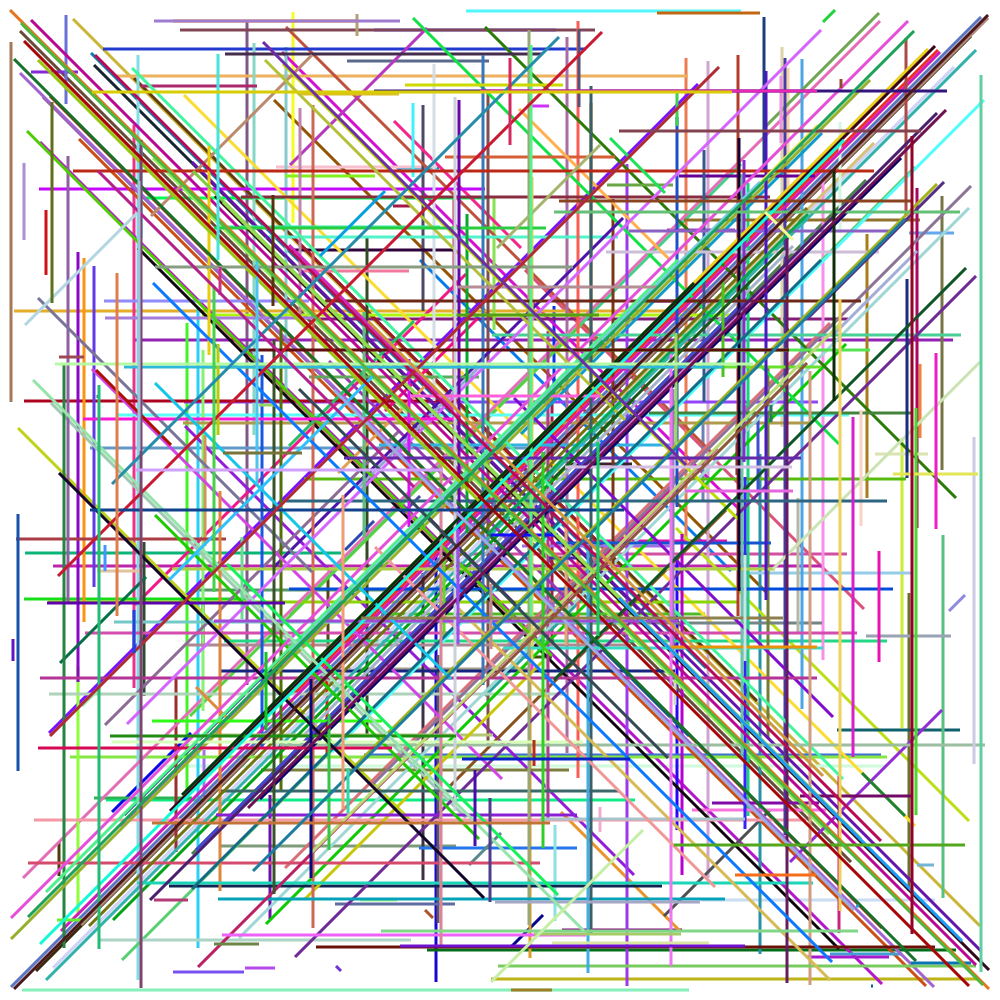

In [5]:
Drawing(1000, 1000)
setline(3)

foreach(l -> begin
  randomhue()
  line(l[1], l[2], :stroke)
end, L)

finish()
preview()